# Programming for data science week 5 - tijdserie-analyse

### Leerdoelen
- Je leert wat een ARIMA model is, en wat de termen AR, I en MA betekenen
- Je leert wat de invloed is van de verschillende termen op de vorm van een tijdsserie
- Je leert hoe je orde van een ARIMA model kan bepalen voor de AR, I en MA termen. 
- Je leert de output van een ARIMA model interpreteren

<div>
<img src="img/Picture1.png" width="600">
</div>

### Achtergrondinformatie:
- Google naar:
    - `python arima model`
    - `python interpret arima model output`
    - `stationairity in timeseries`
    - `acf vs pacf plot`
- Datacamp course `Time Series Analysis in Python`. 

### Opdracht 
- Vul het onderstaande notebook aan op de gevraagde plekken. 
- De tijdsindicaties gaan uit van het lezen van de uitleg en instructie en de programmeervaardigheden die in de voorgaande weken zijn opgedaan. 

# ARIMA modellen
Het doel van een ARIMA model is het nabootsen van een tijdsserie. Dit wordt gedaan door de variaties in de data te modelleren door middel van de volgende drie opties: 

- AR (auto-regressief), voorgaande waardes worden gebruikt om nieuwe waardes te voorspellen.
- I (integrated), niet de originele serie maar een gedifferentieerde tijdsserie wordt gebruikt. Dit om de tijdsserie stationair te maken. 
- MA (moving average), voorafgaande fouten worden gebruikt om nieuwe fouten voorspellen. Dit heeft een smoothing effect, een bewegend gemiddelde. 

Door deze effecten te mengen kun je de meeste tijdsseries nabootsen. In de volgende sectie gaan we de effecten van de AR en MA termen op een tijdsserie bekijken. 

# Model assessment
Na het realiseren van verschillende ARIMA modellen geven we een onderbouwd advies óf en zo ja wélk van deze modellen het geschiktst is voor de analyse van deze tijdreeksen.

In [4]:
# nuttige Jupyter Notebook Magic
%config IPCompleter.greedy = True
%matplotlib inline

# Business understanding
We willen een voorspelling kunnen doen wat de beurskoers van een aandeel de komende dag gaat doen, zodat we kunnen bepalen of we dit aandeel net voor het sluiten van de beurs willen aanschaffen om het later met winst te kunnen verkopen.

# Data understanding

1. In welk format is de data (aangeleverd)? 
         [NIEUW] online beschikbaar via een API
2. Hoe kun je de databron benaderen vanuit python? 
         [NIEUW] m.b.v. een package dat nog niet aan de Anaconda environment is toegevoegd. 
3. Data exploreren:
       a. Informatie over de database
        - Welke tabellen (evt. collections) staan er in de database?
        - Welke kolommen (variabelen) vinden we terug in elke tabel? Kun je aan elke kolom betekenis geven??
        - Wat is het aantal records per tabel?
        - Welke datatypes vinden we terug in de tabellen?
        - Zijn er lege cellen?
       b. Vul dit evt. aan met beschrijvende statistiek, kijk alvast vooruit naar het regressiemodel
       c. Visualiseer de data op een slimme manier, kijk alvast vooruit naar het regressiemodel
       d. Zijn alle variabelen van nominaal of ratio meetniveau? Welke invloed heeft dit op de volgende stappen?
       e. Welk type regressiemodel is waarschijnlijk geschikt om de verbanden te onderzoeken?

We kunnen de API van [Yahoo Finance](https://finance.yahoo.com/) gebruiken om de handelsdata van een aandeel te verkrijgen. Hiervoor moeten we eerst de library toevoegen aan onze pythonomgeving. Dit kan niet via de standaardkanalen van Anaconda, maar wel m.b.v. de package installer van python (pip).

![title](img\yfinance.png)

We kunnen nu de libraries van Yahoo Finance in onze eigen python-omgeving importeren.

In [5]:
# [10 min] installeer het Yahoo Finance package in je python-werkomgeving 
# zorg dat het package in dit Jupyter Notebook gebruikt kan worden.

import yfinance as yf  

We gaan het tijdreeksmodel trainen voor de slotkoersen van Apple aan de Dow Jones. We gebruiken een periode van vijf jaar aan gegevens. We laten het coronajaar 2020 in eerste instantie buiten beschouwing. In een tweede iteratie zullen we de beschikbare gegevens vanaf 2020 ook meenemen. We gebruiken dus de gegevens in de periode van 1 januari 2015 tot 1 januari 2020. Op de website van [Yahoo Finance](finance.yahoo.com) hebben we gevonden dat de korte naam voor het aandeel van Apple `AAPL` is.

In [6]:
#[10 min] Geef hieronder de code om de data te importeren en beschrijf de data
#controleer of het aantal datapunten overeenkomt met het aantal handelsdagen in deze periode.
#onderbouw welke variabele het best gebruikt om de slotkoers te bepalen het beste aansluit bij het business doel. 

koers_aandeel = yf.download('AAPL','2015-01-01','2019-12-31')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [7]:
koers_aandeel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2015-01-02 to 2019-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1257 non-null   float64
 1   (High, AAPL)    1257 non-null   float64
 2   (Low, AAPL)     1257 non-null   float64
 3   (Open, AAPL)    1257 non-null   float64
 4   (Volume, AAPL)  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


Er zijn 252 handelsdagen per jaar aan de NYSE. Het aantal datapunten komt overeen met het aantal handelsdagen in 5 jaar. Alle gegevens zijn geïmporteerd. 

_Overall, the adjusted closing price will give you a better idea of the overall value of the stock and help you make informed decisions about buying and selling, while the closing stock price will tell you the exact cash value of a share of stock at the end of the trading day._ (https://finance.zacks.com/adjusted-closing-price-vs-closing-price-9991.html)

### Data exploratie
Onderzoek het verloop van de beurskoers van het aandeel in deze periode laat zien.

In [8]:
#[10 minuten] Exploreer de variabelen m.b.v. centrum- en spreidingsmaten.
# Gebruik een lijngrafiek om het verloop van de beurskoer te visualiseren.
#maak notities voor belangrijke bevindingen en/of zaken om later op te letten.
#Bewerk de vetgedrukte tekst bij de onderstaande bevindingen. 
#Laat alleen de tekst staan die past bij deze situatie.



In [9]:
koers_aandeel.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320433,24.789802,23.879981,24.778679,212818400
2015-01-05,23.635290,24.169170,23.448433,24.089088,257142000
2015-01-06,23.637505,23.897770,23.274910,23.699790,263188400
2015-01-07,23.968956,24.069058,23.735383,23.846608,160423600
2015-01-08,24.889908,24.947745,24.180292,24.298192,237458000


In [10]:
koers_aandeel.describe().transpose()

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,AAPL,1257.0,3.615437e+01,1.110777e+01,2.067453e+01,2.622433e+01,3.528436e+01,4.416029e+01,7.057826e+01
High,AAPL,1257.0,3.645403e+01,1.118432e+01,2.097891e+01,2.650893e+01,3.570086e+01,4.448479e+01,7.117144e+01
Low,AAPL,1257.0,3.582651e+01,1.100302e+01,2.047543e+01,2.604248e+01,3.496195e+01,4.380501e+01,6.975512e+01
Open,AAPL,1257.0,3.613596e+01,1.108267e+01,2.059673e+01,2.626019e+01,3.533683e+01,4.413897e+01,7.048144e+01
Volume,AAPL,1257.0,1.436337e+08,7.155630e+07,4.544800e+07,9.511960e+07,1.263232e+08,1.715400e+08,6.488252e+08


In [11]:
koers_aandeel['Adj Close'].plot(figsize=(16,10))

KeyError: 'Adj Close'

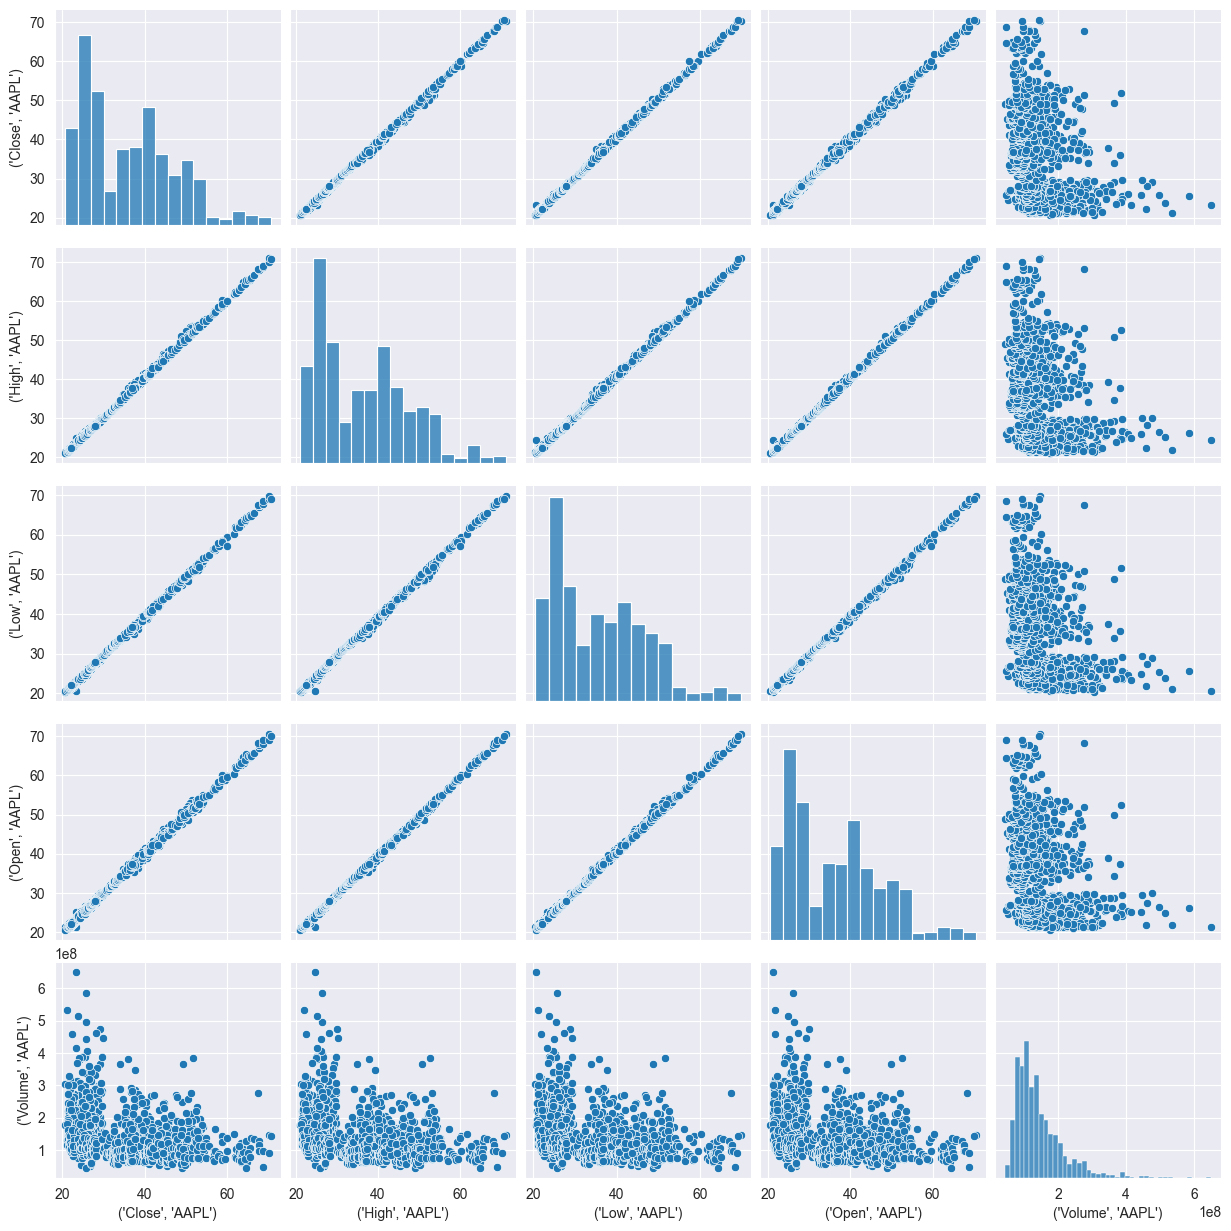

In [12]:
import seaborn as sns
sns.pairplot(koers_aandeel)

<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

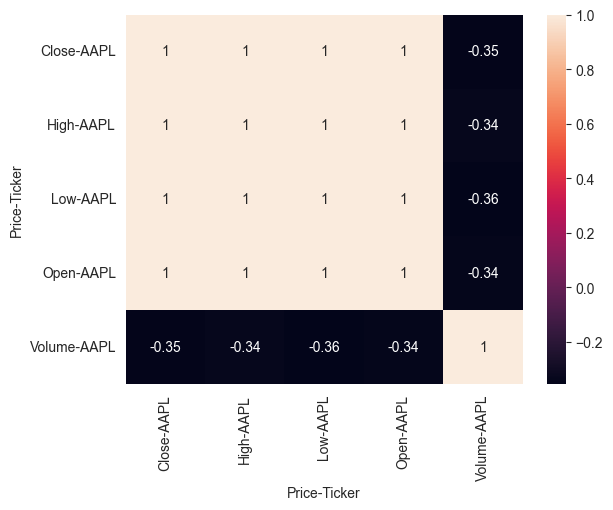

In [13]:
sns.heatmap(koers_aandeel.corr(),annot=True)

Hier vallen de volgende zaken op:
***
[Antwoord]
- De koers van het aandeel toont een stijgende lijn. Het lijkt eerder logaritmisch dan lineair stijgend op het oog. 
- Er zit een sterk verband tussen de koersgegevens. We moeten dus oppassen voor intercollineariteit.
***

We hebben in de Datacamp course [`Simple Time Series`](https://campus.datacamp.com/courses/time-series-analysis-in-python/some-simple-time-series?ex=11)  die we als voorbereiding op deze les gemaakt hebben geleerd dat de data stabiel (stationair) moet zijn om een tijdreeksmodel te kunnen maken waarbij de Auto Regressie en Moving Average worden gebruikt om voorspellingen te kunnen doen. Dit kan in het ARIMA-model eventueel door het instellen van de I-parameter.

Preparatie van de data is **wel/niet** nodig omdat de beurskoers een **dalende/stijgende/gelijkblijvende** trend laat zien, en dus niet stationair is. 

***
[Antwoord]
wel, stijgend
***


## Datapreparatie
**Prepareer de data als dat nodig is** 
***
[Antwoord] niet nodig, wordt bij de parameter tuning van het ARIMA-model afgehandeld. Door het instellen van de I-parameter wordt het model stationair gemaakt.
***

## Data modeling
### Modelkeuze
Het is mogelijk om een regressiemodel te kiezen waarin de onafhankelijke variabele tijd wordt meegenomen en waarbij de data door het model stationair wordt gemaakt. Dit is het `ARIMA`-model. De Integrated (I)-parameter geeft aan welke afgeleide wordt meegenomen om het model stationair te maken. 

Bepaal welke afgeleide nodig is om het model stationair te maken (de lijn loopt dan horizontaal). Dit bepaalt de instelling voor de I-parameter.

In [14]:
# [10 min] maak gebruik van de differentiatie-methode in Pandas en bepaal 'op het oog' wanneer de data stationair is.
# toon na elke differentiatiestap de lijngrafiek met de afgeleide data.

In [15]:
koers_aandeel['Adj Close'].diff().plot(figsize=(16,10))

KeyError: 'Adj Close'

Op het oog kunnen we nu al vaststellen dat de data stabiel (stationair) is. In [een gevorderde cursus](https://campus.datacamp.com/courses/arima-models-in-python/chapter-1-arma-models?ex=5) op Datacamp vinden we dat we de stabiliteit van data ook statistisch kunnen toetsen m.b.v. de Augmented Dicky-Fuller test.  

We voeren deze test eerst uit voor de oorspronkelijke dataset.
De test is statistisch significant bij een p-waarde kleiner dan 0,10 is. Dus de data is stationair als p<0,10. 

In [16]:
# [10 min] deze test kan niet overweg met missende waardes, daarom prepareren we de dataset die we meegeven aan de adfuller-functie.

from statsmodels.tsa.stattools import adfuller

result = adfuller(koers_aandeel['Adj Close'].dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

KeyError: 'Adj Close'

**Was je conclusie 'op het oog' juist?**

In [17]:
# [5 min] Voer de ADFuller-test uit voor elke afgeleide totdat het resultaat statistisch significant is. 
from statsmodels.tsa.stattools import adfuller

result = adfuller(koers_aandeel['Adj Close'].diff().dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

KeyError: 'Adj Close'

## Datapreparatie 
**Prepareer de data als dat nodig is: definieer de stationaire dataset en verwijder de rijen met missing values werk hiermee verder.** 

In [18]:
#[1 min]
ARMA_data_slotkoers = koers_aandeel['Adj Close'].diff()

KeyError: 'Adj Close'

# LES 2 ARIMA-model bouwen en gebruiken

### Model bouwen
#### Parameters instellen
Bij het opstellen van het ARIMA-model moeten we voor de I-parameter (integrated) de waarde 1 meegeven: `ARIMA(data, order=(?,1,?)).fit()`

We volgen de [Datacamp course](https://campus.datacamp.com/courses/time-series-analysis-in-python/some-simple-time-series?ex=13) verder en bepalen de waarde voor het voortschrijdend gemiddelde (moving average: MA) voor het tijdreeksmodel m.b.v. de autocorrelatie. 

*Definities*

Het ACF plot kijkt naar de correlatie van een waarde met vorige lags, maar houdt hierbij een rekening met het feit dat er eerder lags al waren.
Een lag is een vaste tijdsperiode. Afhankelijk van de trends in de data kun je een `lag` instellen op een jaar (bijv. temperatuur in Nederland), een maand (bijv. voor banksaldo van studenten), een week (bijv. aantal verplaatsingen i.v.m. woon-werkverkeer), etc. 

We importeren het package `plot_acf` uit de `statsmodels`-library om een autocorrelatieplot te kunnen maken. 

In [1]:
from statsmodels.graphics.tsaplots import plot_acf

In de koers van het aandeel Apple lijkt geen terugkerend patroon te zitten. Dit betekent dat we geen `lag`-parameter hoeven in te stellen. 

In [2]:
plot_acf(ARMA_data_slotkoers.dropna())

NameError: name 'ARMA_data_slotkoers' is not defined

De auto-correlatiegrafiek wordt twee keer weergegeven. Voor het interpreteren van de grafiek hoeven we hier niets aan te doen. Het toepassen van de methode `gca()` zou het twee keer afbeelden van de grafiek voorkomen.

In dit autocorrelatieplot liggen bijna alle waardes binnen het lichtblauwe onzekerheidsgebied (deze variantie in autocorrelatie kan worden verklaard door ruis). Dit betekent dat we geen MA-parameter hoeven in te stellen. 

Voor de zekerheid bekijken we ook de autocorrelaties met een lag van een jaar.

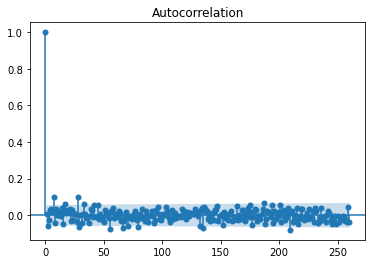

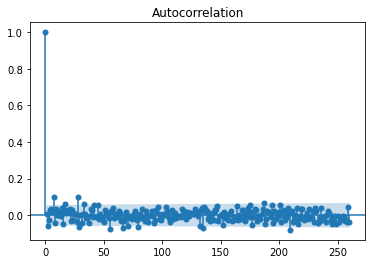

In [80]:
# [10 min] maak het autocorrelatieplot met lags van een week. 
# Hou er bij het bepalen van de lags rekening mee dat we alleen datapunten hebben voor de handelsdagen.
# Interpreteer de acf-plot voor het instellen van de MA-parameter. 
plot_acf(ARMA_data_slotkoers.dropna(), lags=260)

Beide autocorrelatiegrafieken (zonder lag en met lag van een jaar) lijken erg op elkaar. We hoeven dus geen lag-parameter in te stellen. 

Op de allereerste waarde na ligt de autocorrelatie dicht bij 0. 

Conclusie: de MA-parameter hoeven we voor dit model dus niet in te stellen (dus geven we de waarde 0). De I-waarde was al bekend, nl. 1: `ARIMA(data, order=(?,1,0)).fit()`

Voor het aandeel Apple kan een moving average van 0 als volgt worden uitgelegd: het gewogen gemiddelde van de vorige slotkoersen heeft geen invloed op de huidige slotkoers.

Tenslotte moet nog worden vastgesteld hoeveel ruis er in het model zit en of deze ruis invloed heeft op de variantie van de slotkoersen; dit is de Auto Regressie (`AR`) waarde m.b.v. de partiële autocorrelatie. De partiële autocorrelatie geeft weer hoe sterk het verband is tussen de waarde van een lag en de waarde van voorgaande lags. Als er tussen de lags nog significante correlatie bestaat is dit een aanwijzing dat er auto-correlatie optreed en dat het instellen van de AR parameter een goed idee is. 

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf

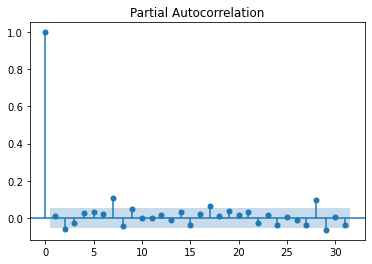

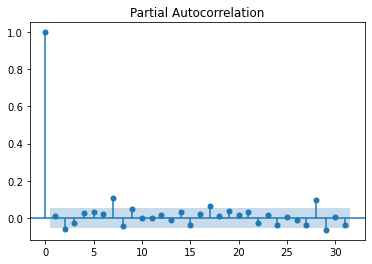

In [20]:
#[5 min]
plot_pacf(ARMA_data_slotkoers.dropna())

Veruit de meeste lags hebben een partiële autocorrelatie van dichtbij 0. We zien twee uitschieters naar boven en één naar beneden. Omdat het nu nog uitzonderingen zijn is dit onvoldoende om een AR-waarde toe te voegen.  De MA en I-waarde waren al bekend, we voegen de AR-waarde 0 toe: `ARIMA(data, order=(0,1,0)).fit()`

Nu we de parameters hebben vastgesteld kunnen we het tijdreeksmodel uitvoeren.

C:\Users\p16382977\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\p16382977\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated f

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1257
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1137.315
Method:                           css   S.D. of innovations              0.598
Date:                Wed, 03 Mar 2021   AIC                           2278.630
Time:                        08:10:08   BIC                           2288.903
Sample:                             1   HQIC                          2282.491
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0374      0.017      2.219      0.026       0.004       0.070


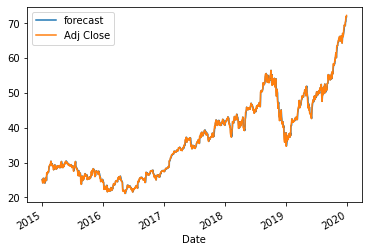

In [36]:
#[5 min]
from statsmodels.tsa.arima_model import ARIMA


slotkoers_model = ARIMA(koers_aandeel['Adj Close'], order=(0,1,0))
slotkoers_model_fit = stock_model.fit(disp=0)
print(slotkoers_model_fit.summary())
fig = slotkoers_model_fit.plot_predict(dynamic=False)

***
De waarschuwing negeren we voor nu omdat het voorgestelde package (nog) geen `predict plot` bevat. 
***

## Voorbeeld terugkerend patroon
Aandelenkoersen hebben dit vaak veel minder. Onderstaand voorbeeld met verkoopcijfers van een landbouwvoertuigenfabrikant bevat wel zo'n duidelijk patroon. Nu we een ARIMA model hebben gebouwd gaan we even terug naar wat we bij ADA met de hand en rekenmachine hebben gedaan.

<AxesSubplot:>

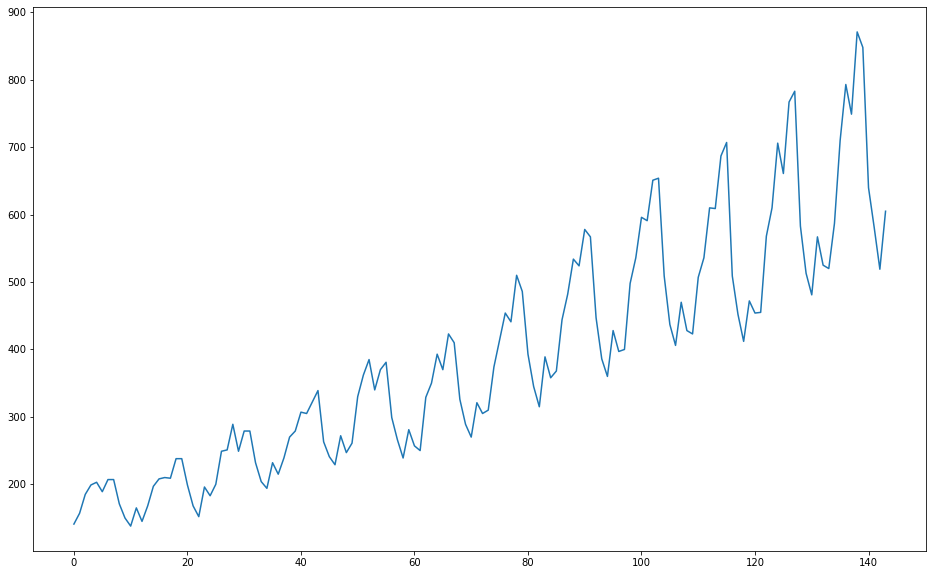

In [1]:
# [5 min]
from io import StringIO
import requests
import pandas as pd
verkoopdata = pd.read_csv(StringIO(requests.get('http://www.ucanalytics.com/blogs/wp-content/uploads/2015/06/Tractor-Sales.csv').text
))
verkoopdata['Number of Tractor Sold'].plot(figsize=(16,10))

Bij ADA hebben we geleerd om als eerste te kijken naar de veranderingen in de pieken. We zien hier dat de amplitudes steeds groter worden. Het is daarom een multiplicatief model. Dit soort patronen komen

Daarna rekenen we het voortschrijdend gemiddelde uit. Met dit voortschrijdend gemiddelde wordt vervolgens een reguliere lineaire regressie gedaan. Ook wordt er gekeken naar de spreidingsbreedte per periode (im dit geval van 12 maanden). Waarschijnlijk neemt het verschil tussen minimum en maximum amplitude met een redelijk constante factor toe. Deze kun je uit de spreidingsbreedtetabel halen. Voorspellingen volgen uit de lineaire regressie vermenigvuldigd met de spreidingsbreedtefactor voor die maand. 

In het ARIMA model heeft de AR term invloed op het rustig of heftig golven van de lijn, en de MA term op de kleine afwijkingen. Waarschijnlijk is het nog beter om een SARIMA model te gebruiken als je seasonality herkend. 

### Model assessment
De p-waarde (P>|z|) gebruiken we om te bepalen of de losse componenten van het getrainde model (AR, I en MA) statistisch significant is. In dit model is de p-waarde <0.1, dit hadden we liever kleiner gezien (dus significanter), maar is voldoende acceptabel. 

*Definitie:* de BIC en AIC waarden zijn maten om te bepalen hoe goed een statistisch model van toepassing is. Het Akaike Information Criterium (AIC) is een criterium dat een compromis maakt tussen de kwaliteit van de fit en de complexiteit van het model. Hoe slechter de fit is, hoe hoger het AIC criterium. 

We beoordelen het door ons gekozen model door de AIC en BIC-waarden de vergelijken met ARIMA-modellen waar de AR en MA parameters wel zijn ingesteld.



In [13]:
# [20 min] Train het tijdreeksmodel met de AR, I en MA in elk geval met de waarden (1,1,0), (0,1,1), (1,1,2), (2,1,1) en (2,1,2)
# Maak een keuze óf we een ARIMA-model kunnen toepassen om de aandelenkoers van het aandeel Apple te voorspellen. 
# Bij een positieve keuze: welke parameters zijn het geschiktst om te gebruiken?
# maak een afweging tussen fit en complexiteit. Kies het geschiktste model met de laagste complexiteit.

***
In de uitwerking laten we zien hoe het herhaalbaar kan, m.b.v. een functie. De studenten mogen ook handmatig de vijf ARIMA-modellen bouwen met de ingestelde parameters.
***

In [40]:
def arima_assessment(data,AR_min, AR_max,MA_min, MA_max,I):
    from statsmodels.tsa.arima_model import ARIMA

    for AR in range(AR_min, AR_max+1):
        for MA in range (MA_min, MA_max+1):
            try:
                model=ARIMA(data, order=(AR,I,MA))
                result=model.fit()
                print(AR, MA, result.summary())
            except:
                print(AR, MA, None)

In [46]:
#code om de waarschuwingen over het gebruik van het verouderde package tijdelijk niet weer te geven.
import warnings, math
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
   
    arima_assessment(koers_aandeel['Adj Close'],0,2,0,2,1)

0 0                              ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1257
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1137.315
Method:                           css   S.D. of innovations              0.598
Date:                Wed, 03 Mar 2021   AIC                           2278.630
Time:                        08:35:53   BIC                           2288.903
Sample:                             1   HQIC                          2282.491
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0374      0.017      2.219      0.026       0.004       0.070
0 1                              ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. 

***
[Antwoord]
De AIC en BIC-waarden zijn vergelijkbaar. 

Conclusie: 
Het ARIMA-model is geschikt om de aandelenkoers van Apple te voorspellen.

Hierbij gebruiken we de parametersettings:(0,1,0)

Toelichting: het door ons gekozen model (zonder AR en MA waarden, maar wel stationair gemaakt) heeft een vergelijkbare afweging tussen fit en complexiteit. In de andere modellen zijn de AR en MA waarden hoog (dus onvoldoende statistisch significant). We kiezen altijd voor het geschiktste model met de laagste complexiteit.
***

## Evaluatie
We kunnen het model nu gebruiken om te voorspellen hoeveel punten de slotkoers de volgende dag hoger of lager ligt.

Deze voorspelling was voor de eerste handelsdag in 2020. Lag de slotkoers van het aandeel Apple inderdaad 0.04 punten hoger zoals voorspeld? 

In [52]:
#[5 min]
ARIMA(koers_aandeel['Adj Close'], order=(0,1,0)).fit().predict()[0]

C:\Users\p16382977\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\p16382977\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated f

0.03742880522576214

# Opdracht:
Verdeel het werk in de groep:
- De helft bouwt een ARIMA-model voor aandelenkoers Apple vanaf 2020 tot nu.
- De andere helft bouwt een ARIMA-model voor aandelenkoers vanaf 2014 tot nu.
- Vergelijk hierna de 3 gebouwde ARIMA-modellen. 

Welk model adviseer je om te gebruiken voor de koersvoorspellingen in 2021? 
Welk model adviseer je om te gebruiken voor de koersvoorspellingen voor de komende 25 jaar?

In [ ]:
# [30 minuten (20 bouwen + 10 vergelijken)]

In [64]:
koers_aandeel = yf.download('AAPL','2020-01-01','2021-03-12')

[*********************100%***********************]  1 of 1 completed


In [65]:
koers_aandeel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 2019-12-31 to 2021-03-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       294 non-null    float64
 1   High       294 non-null    float64
 2   Low        294 non-null    float64
 3   Close      294 non-null    float64
 4   Adj Close  294 non-null    float64
 5   Volume     294 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 16.1 KB


***
Let op dat de slotkoers van 31 december 2019 ook nog wordt meegenomen. We moeten dus een dag later beginnen.
***

In [66]:
koers_aandeel = yf.download('AAPL','2020-01-02','2021-03-12')

[*********************100%***********************]  1 of 1 completed


In [67]:
koers_aandeel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 293 entries, 2020-01-02 to 2021-03-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       293 non-null    float64
 1   High       293 non-null    float64
 2   Low        293 non-null    float64
 3   Close      293 non-null    float64
 4   Adj Close  293 non-null    float64
 5   Volume     293 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 16.0 KB


In [68]:
koers_aandeel.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.333511,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.610840,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.197395,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.848442,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,75.036385,132079200


<AxesSubplot:xlabel='Date'>

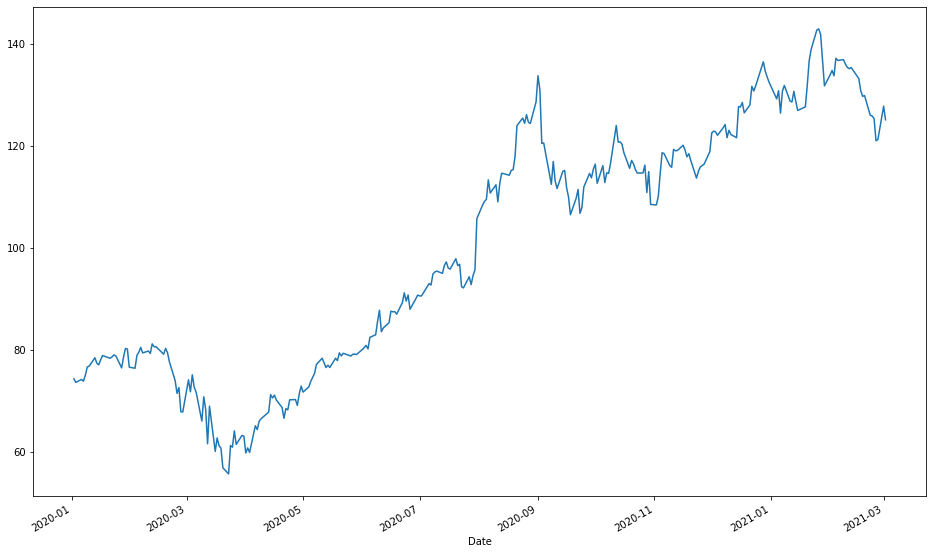

In [70]:
koers_aandeel['Adj Close'].plot(figsize=(16,10))

In [71]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(koers_aandeel['Adj Close'].dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.831332
p-value: 0.809745
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572


In [72]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(koers_aandeel['Adj Close'].diff().dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.481767
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572


- Voor een stationair model moeten we de eerste afgeleide gebruiken.
- De I-parameter moet op 1 worden ingesteld.

In [40]:
def arima_assessment(data,AR_min, AR_max,MA_min, MA_max,I):
    from statsmodels.tsa.arima_model import ARIMA

    for AR in range(AR_min, AR_max+1):
        for MA in range (MA_min, MA_max+1):
            try:
                model=ARIMA(data, order=(AR,I,MA))
                result=model.fit()
                print(AR, MA, result.summary())
            except:
                print(AR, MA, None)

In [86]:
#code om de waarschuwingen over het gebruik van het verouderde package tijdelijk niet weer te geven.
import warnings, math
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
   
    arima_assessment(koers_aandeel['Adj Close'],0,5,0,5,1)

0 0                              ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                  292
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -694.667
Method:                           css   S.D. of innovations              2.612
Date:                Wed, 03 Mar 2021   AIC                           1393.334
Time:                        08:58:08   BIC                           1400.688
Sample:                             1   HQIC                          1396.280
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1739      0.153      1.138      0.255      -0.126       0.474
0 1                              ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. 

***
# Conclusie
De AIC en BIC-waarden van alle modellen zijn vergelijkbaar. Deze waarden liggen lager dan bij het model dat we hebben getraind over de periode 2015-2019. Dit model over 2020-2021 is dus krachtiger. 
Pas bij AR en MA waarden van 3 laat het model ook statistische significantie zien. 
Advies: gebruik het ARIMA-model met de parameters (3,1,3)
***

In [93]:
koers_aandeel = yf.download('AAPL','2015-01-02','2021-03-12')

[*********************100%***********************]  1 of 1 completed


In [94]:
koers_aandeel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1551 entries, 2015-01-02 to 2021-03-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1551 non-null   float64
 1   High       1551 non-null   float64
 2   Low        1551 non-null   float64
 3   Close      1551 non-null   float64
 4   Adj Close  1551 non-null   float64
 5   Volume     1551 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 84.8 KB


In [95]:
koers_aandeel.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.861401,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.161013,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.163294,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.502111,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.443539,237458000


<AxesSubplot:xlabel='Date'>

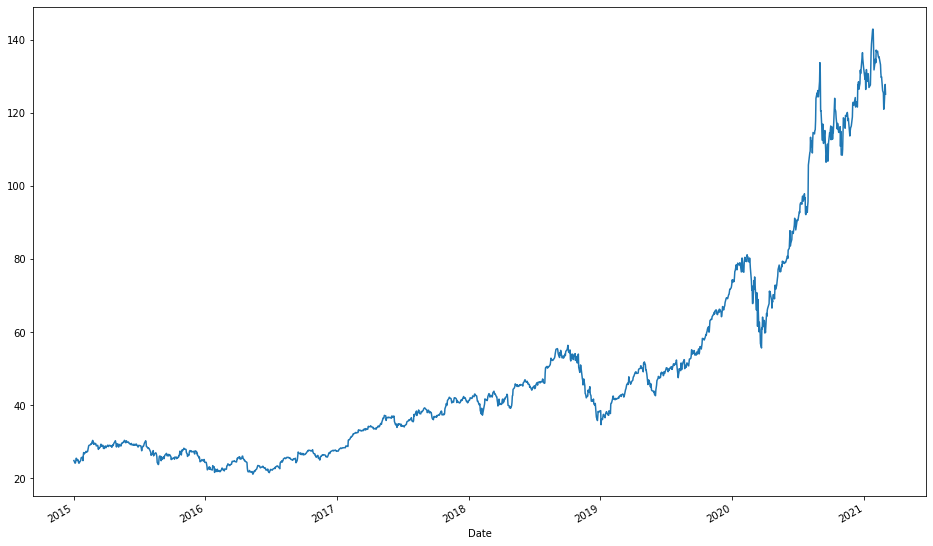

In [96]:
koers_aandeel['Adj Close'].plot(figsize=(16,10))

In [97]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(koers_aandeel['Adj Close'].dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.464782
p-value: 0.997389
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


In [98]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(koers_aandeel['Adj Close'].diff().dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.967516
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


- Voor een stationair model moeten we de eerste afgeleide gebruiken.
- De I-parameter moet op 1 worden ingesteld.

In [99]:
def arima_assessment(data,AR_min, AR_max,MA_min, MA_max,I):
    from statsmodels.tsa.arima_model import ARIMA

    for AR in range(AR_min, AR_max+1):
        for MA in range (MA_min, MA_max+1):
            try:
                model=ARIMA(data, order=(AR,I,MA))
                result=model.fit()
                print(AR, MA, result.summary())
            except:
                print(AR, MA, None)

In [100]:
#code om de waarschuwingen over het gebruik van het verouderde package tijdelijk niet weer te geven.
import warnings, math
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
   
    arima_assessment(koers_aandeel['Adj Close'],0,5,0,5,1)

0 0                              ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1550
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2553.716
Method:                           css   S.D. of innovations              1.257
Date:                Wed, 03 Mar 2021   AIC                           5111.432
Time:                        09:06:12   BIC                           5122.125
Sample:                             1   HQIC                          5115.409
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0647      0.032      2.026      0.043       0.002       0.127
0 1                              ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. 

***
De AIC en BIC-waarden van alle modellen zijn vergelijkbaar. Deze waarden liggen hoger dan bij het model dat we hebben getraind over de andere periodes Dit model over 2015-2021 is dus minder krachtig. 
Bij AR en MA waarden van 0 laat het model al statistische significantie zien. 
Advies is om dit model niet te gebruiken om de toekomstige koersen - op korte termijn - te voorspellen. 

Overall advies: gebruik het ARIMA-model dat getraind is over de periode 2020-nu met de parameters (3,1,3)
***

# Evaluatie
We gebruiken het ARIMA-model dat getraind is met de gegevens vanaf 2015 tot vandaag. Dit model laat de beste performance zien in de voorspellingen.

In [102]:
ARIMA(koers_aandeel['Adj Close'], order=(0,1,0)).fit().predict()[0]

C:\Users\p16382977\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\p16382977\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


0.06468296912408644

Op basis van dit model is de voorspelling dat de koers van het aandeel Apple op de eerstvolgende beursdag 6,4% zal stijgen.